# COGS 108 - Final Project 

# Overview

*In this project, I am mostly interested in predicting rating of a restaurant using inspection data and yelp data collected previously. The research question and hypothesis both suggests that the project will be focusing on exploring the relationship between rating of a restaurant and all the factors that shape it as well as how to predict rating given these data. The project follows the process of exploring the data, summarizing results, and building models.*

# Name & GitHub

- Name: Haibo Li
- GitHub Username: Haibo3939

# Research Question

*How do we predict the rating of each restaurant using yelp data and the inspection score?*

## Background and Prior Work


- 1) There are 18 cities with more than 13, 800 permanent retail food facilities in San Diego County, including voer 8,100 restaurants.
- 2) Grading system:
    - a) Each violation on Food Inspection Report is assigned a point value depending on its importance.
    - b) Once the Specialist completes an inspection, the points are added up and subtracted from 100. The resulting number is the inspection "score"
    - c) A letter grade is assigned to the facility based on the inspection score. An "A" grade means the facility earned a score of 90 to 100 percent and is in satidfactory compliance with state law; a "B" means the facility earned a score of 80 to 89 percent and needs improvement; a "C" means the facility earned a score of 79 percent or less and is a failing grade.
    - d) The grade card must be displayed nead the public entrance during hours of operation.
- 3) What is the inspector looking for?
    - a) Food contamination
    - b) Temperature control
    - c) Hygiene
    - d) General cleanliness
    - e) Health
- 4) Food-borne illness affects an estimated 48 million Americans each year, reulting in 3,000 deaths and the hospitalization of 128,000 people, according to the Centers for Disease Control and Prevention (CDC). Food-borne illness in the U.S. is enormously costly, lost productivity, and lost wages, not to mention litigation expenses.

References (include links):
- 1) https://www.sandiegocounty.gov/content/sdc/deh/fhd/food/food.html
- 2) https://www.sandiegocounty.gov/content/sdc/deh/fhd/food/food.html
- 3) https://blog.typsy.com/how-do-health-inspections-work
- 4) https://hbr.org/2019/05/to-improve-food-inspections-change-the-way-theyre-scheduled

# Hypothesis


*There is a linear relationship between ratings and inspection scores so that it is reasonable to predict ratings based on inspection scores.*

# Dataset(s)

- Dataset Name: inspections (data/inspections.csv)
- Link to the dataset: In the health inspection datasets
- Number of observations: 18466 observations

The inspections dataset includes the both the restaurant information and the inspection information and score for each restaurant. The restaurant information includes the names, locations, etc. The inspection information includes the inspection history, and specified sores and critical issue counts。

- Dataset Name: yelp (data/yelp.csv)
- Link to the dataset: In the health inspection datasets
- Number of observations: 3688

The yelp datset includes the category, price, and rating of each restaurants. Locations are also included, and we are using locations (latitude and longitude) to merge two datasets.

- Combinations of two datasets:
    - Number of observations: 425
    - Merge logic: both the datasets contain the latitude and longitude of restaurants. We are using this share information to combine them.

# Setup

In [218]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
sns.set()
sns.set_context('talk')
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [39]:
# store inspections.csv into pandas dataframe, inspections
fp_insp = os.path.join('data', 'inspections.csv')
inspections = pd.read_csv(fp_insp)
# store yelp.csv into pandas dataframe, yelp
fp_yelp = os.path.join('data', 'yelp.csv')
yelp = pd.read_csv(fp_yelp)

In [40]:
# take a look at inspections and yelp
inspections.head()

,hsisid,date,name,address1,address2,city,state,postalcode,phonenumber,restaurantopendate,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,3000 New Bern Ave,NaN,raleigh,NC,27610,(919) 350-8047,2002-12-21T00:00:00Z,...,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,1030-149 N Rogers Ln,NaN,raleigh,NC,27610,(919) 255-9556,2004-05-04T00:00:00Z,...,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,6209 ROCK QUARRY RD,STE 126,raleigh,NC,27610,(919) 773-2285,2008-08-04T00:00:00Z,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,1065 Darrington DR,NaN,cary,NC,27513,NaN,2012-03-28T00:00:00Z,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,841 E Gannon AVE,NaN,zebulon,NC,27597,(919) 269-2221 ext. 304,2008-02-25T00:00:00Z,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [52]:
yelp.head()

,id,name,is_closed,rating,review_count,address1,zip_code,latitude,longitude,price,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,42nd-street-oyster-bar-rdu-airport-morrisville,42nd street oyster bar - rdu airport,False,2.5,23,2400 John Brantley Blvd,27560,35.873808,-78.790896,$$,...,False,True,False,False,False,False,True,False,False,False
1,aldi-foods-cary,aldi foods,False,4.0,17,2303 NW Maynard Rd,27519,35.802840,-78.785930,$,...,False,False,False,False,False,False,False,False,False,False
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,False,5.0,2,Crabtree Valley Mall,27612,35.839681,-78.678791,$,...,True,False,False,False,False,False,False,False,False,False
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,False,3.0,16,3401 Raleigh Rd Pkwy W,27893,35.743170,-77.964160,$$,...,True,False,False,False,False,True,False,False,False,False
4,subway-wilson-4,subway,False,3.5,3,4934 Raleigh Rd,27896,35.762936,-77.999428,$,...,False,False,False,False,False,False,False,False,False,False


In [53]:
# combine two dataframes and name it df
yelp_to_combine = yelp[['rating', 'review_count', 'price', 'longitude', 'latitude']]
df = yelp_to_combine.merge(inspections, left_on=['longitude', 'latitude'], right_on=['x', 'y'])
df.head()

,rating,review_count,price,longitude,latitude,hsisid,date,name,address1,address2,...,num_non_critical,num_critical_previous,num_non_critical_previous,num_critical_mean_previous,num_non_critical_mean_previous,avg_neighbor_num_critical,avg_neighbor_num_non_critical,top_match,second_match,critical
0,3.5,11,$$,-78.741343,35.770724,4092016553,2013-11-26T00:00:00Z,HAWTHORN SUITES BREAKFAST,1020 BUCK JONES RD,NaN,...,1,NaN,NaN,NaN,NaN,1.833333,6.566667,4.092012e+09,4.092014e+09,0
1,3.5,11,$$,-78.741343,35.770724,4092016553,2014-07-25T00:00:00Z,HAWTHORN SUITES BREAKFAST,1020 BUCK JONES RD,NaN,...,2,0.0,1.0,0.00,1.00,2.416667,6.633333,4.092012e+09,4.092014e+09,1
2,3.5,11,$$,-78.741343,35.770724,4092016553,2015-06-12T00:00:00Z,HAWTHORN SUITES BREAKFAST,1020 BUCK JONES RD,NaN,...,0,1.0,2.0,0.50,1.50,2.483333,6.296667,4.092012e+09,4.092014e+09,1
3,3.5,11,$$,-78.741343,35.770724,4092016553,2015-12-29T00:00:00Z,HAWTHORN SUITES BREAKFAST,1020 BUCK JONES RD,NaN,...,2,5.0,0.0,2.00,1.00,2.275714,6.208571,4.092012e+09,4.092014e+09,1
4,3.5,11,$$,-78.741343,35.770724,4092016553,2016-06-10T00:00:00Z,HAWTHORN SUITES BREAKFAST,1020 BUCK JONES RD,NaN,...,5,1.0,2.0,1.75,1.25,2.095000,5.891667,4.092012e+09,4.092014e+09,0


In [54]:
# the combined dataframe has 425 observations
df.shape

(425, 41)

In [55]:
df.columns

Index(['rating', 'review_count', 'price', 'longitude', 'latitude', 'hsisid',
       'date', 'name', 'address1', 'address2', 'city', 'state', 'postalcode',
       'phonenumber', 'restaurantopendate', 'days_from_open_date',
       'facilitytype', 'x', 'y', 'geocodestatus', 'zip', 'type', 'description',
       'inspectedby', 'inspection_num', 'inspector_id',
       'previous_inspection_date', 'days_since_previous_inspection',
       'previous_inspection_by_same_inspector', 'score', 'num_critical',
       'num_non_critical', 'num_critical_previous',
       'num_non_critical_previous', 'num_critical_mean_previous',
       'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
       'avg_neighbor_num_non_critical', 'top_match', 'second_match',
       'critical'],
      dtype='object')

In [56]:
yelp.price.unique()

array(['$$', '$', '$$$', nan, '$$$$', '19198407700', '18775769464',
       '19194811105', '19196150592', '19192666118', '19108685071',
       '19198469808', '19199869521', '19194660308', '19194660360',
       '19198884887', '19194607025', '19194692122', '19194899364',
       '19195827000', '19193870228', '19197843100', '19198217991',
       '19106926261', '19198217400', '19198320501', '19196000870',
       '19198824629', '19195214445', '19198484906', '19198500891',
       '19194362246', '19197793900', '19197822594', '19198344000',
       '19198213111', '19194250800', '19195526154', '19198473548'],
      dtype=object)

# Data Cleaning

Describe your data cleaning steps here.

In [4]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

- In order to check the cleanness of the dataset, will need to first decide what features are necessary for our analysis.
- `rating`, `review_count`, `price`, `score` and `critical` are essential columns that contains neccesary information for my hypothesis and modeling.

In [59]:
# First, clean rating data

In [60]:
df.rating

0      3.5
1      3.5
2      3.5
3      3.5
4      3.5
      ... 
420    1.0
421    1.0
422    1.0
423    1.0
424    1.0
Name: rating, Length: 425, dtype: float64

In [61]:
df.rating.unique()

array([3.5, 3. , 2. , 4. , 4.5, 1.5, 1. ])

- As we can see from above, rating data contains float data from 1.0 to 4.5. This is exactly what we need. Therefore, we'll leave rating as is.

In [62]:
# Second, clean review_count data

In [63]:
df.review_count

0      11
1      11
2      11
3      11
4      11
       ..
420     1
421     1
422     1
423     1
424     1
Name: review_count, Length: 425, dtype: int64

In [64]:
df.review_count.unique()

array([ 11,  15,   5,  70,  28, 102,  10, 247, 113, 187,  84,  29,  55,
         8,  24, 277,  53,  37,  78,  44,  52, 202, 224,  22,  71, 220,
       136,  30, 149, 125,  27,   9,  16, 126, 140,   7,   1])

- As we can see from above, review_count data contains int data from 1 to 277. This is exactly what we need. Therefore, we'll leave review_count as is.

In [65]:
# Third, we will be cleaning price data

In [66]:
df.price

0               $$
1               $$
2               $$
3               $$
4               $$
          ...     
420    19194660308
421    19194660308
422    19194660308
423    19194660308
424    19194660308
Name: price, Length: 425, dtype: object

In [67]:
df.price.unique()

array(['$$', '$', nan, '$$$', '19194660308'], dtype=object)

- As we can see from above, price data contains multiple types of data.
    - First, the dollar sign representation how expensive the restaurant is per customer. We will change this representation of price to ordinal variables 1, 2, and 3.
    - Second, null values.
    - Finally, a series of number, 19194660308, we will change this into null values since it has mysterious meaning.

In [68]:
# define a function to help us clean price data
def clean_price(p):
    if pd.isnull(p):
        return p
    if len(p) < 4:
        return len(p)
    return np.NaN
    

In [72]:
# Change the price column to cleaned price
df['price'] = df.price.apply(clean_price)

In [76]:
# Finally, there is no need to clean score and critical columns since they are cleaned already.

In [77]:
df.score.unique()

array([100. ,  99.5,  96. ,  97.5,  96.5,  95. ,  99. ,  98.5,  94.5,
        94. ,  93. ,  97. ,  95.5,  98. ,  92. ,  91.5,  85.5,  83. ,
        88. ,  92.5,  84. ,  88.5,  93.5,  87.5,  86. ,  91. ,  90. ,
        84.5,  79. ])

In [78]:
df.critical.unique()

array([0, 1])

# Data Analysis & Results

#### "Critical" vs. "Non-Critical"
- What we are most interested in is whether or not there is a relationship bewteen the inspection scores and restsaurants rating.
- The section below will be conducted by this purpose and further prediction.

In [79]:
# display the dataframe with needed information
df[['rating', 'review_count', 'price', 'score', 'critical']]

,rating,review_count,price,score,critical
0,3.5,11,2.0,100.0,0
1,3.5,11,2.0,99.5,1
2,3.5,11,2.0,96.0,1
3,3.5,11,2.0,100.0,1
4,3.5,11,2.0,96.0,0
...,...,...,...,...,...
420,1.0,1,NaN,98.5,1
421,1.0,1,NaN,96.0,1
422,1.0,1,NaN,93.0,1
423,1.0,1,NaN,92.5,1


- Logically, the inspection score will be lower if there is critical health issue with the restaurant.
- Cells below examine this assumption.

In [82]:
critical_mean = df[df.critical == 1].score.mean()
critical_mean

95.81285714285714

In [83]:
non_critical_mean = df[df.critical == 0].score.mean()
non_critical_mean

98.11333333333333

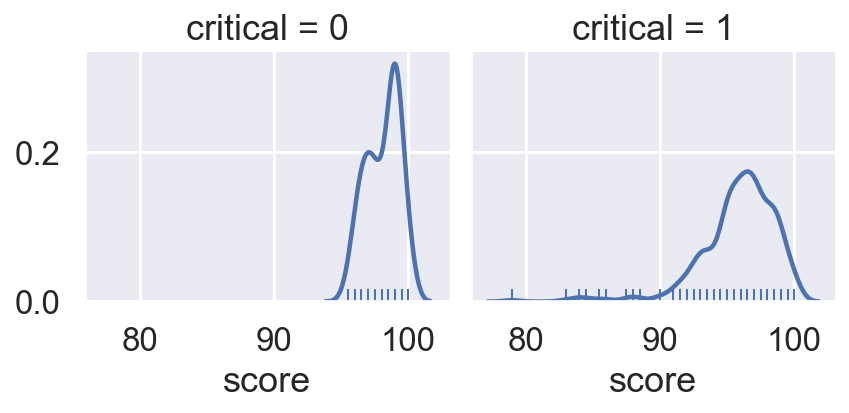

In [148]:
critical = df[df.critical == 1]['score']
non_critical = df[df.critical == 0]['score']
g = sns.FacetGrid(df, col="critical", legend_out=True)
g = g.map(sns.distplot, "score",  hist=False, rug=True)

- As we can see, the restaurants that does not have critical inspection issues tend to have higher mean score than those who have. In addition, non_critical restaurants tend to be more symmetric and "critical" restaurants are more skewed to the left.

#### Review Counts vs. Ratings
- Personally, I would rating the restaurants that make me uncomfortable or upset, but I would normally not to rate those which make me satisfied. In this case, everyone has his/her/their own preferences in terms of how to rate and when to rate the restaurants.
- Generally, people tend to rate restaurants which they love the most or hate the most.
- The cells below will explore the relationship between review counts and ratings.

In [116]:
# average review count for a restaurant
mean_review_count = df.review_count.mean()
mean_review_count

67.12235294117647

In [119]:
(
    df
    .assign(greater_than_avg=df['review_count'] > mean_review_count)
    .groupby('greater_than_avg')
    .rating
    .agg('mean')
)

greater_than_avg
False    3.278656
True     3.686047
Name: rating, dtype: float64

- The result shows that the restaurants with the number of review greater than the average has mean rating of 3.686047 and those below average has 3.27 rating on average.
- The result shown above explains the fact that the restaurants with the number of review greater than the average have a greater average rating than those below average number of review.
- This consistance to what we have assumed above.

greater_than_avg
False    AxesSubplot(0.125,0.125;0.775x0.755)
True     AxesSubplot(0.125,0.125;0.775x0.755)
Name: rating, dtype: object

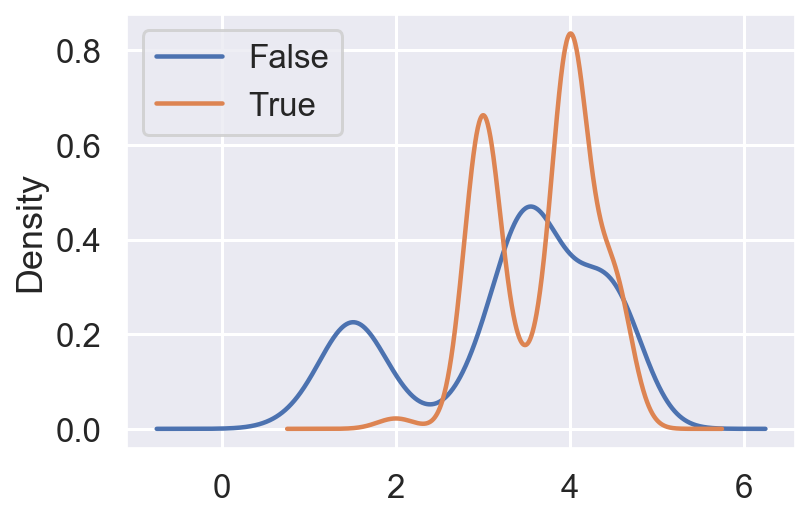

In [149]:
(
    df
    .assign(greater_than_avg=df['review_count'] > mean_review_count)
    .groupby('greater_than_avg')
    .rating
    .plot(kind='kde',legend=True)
)

- True and False means whether or not the restaurant's review count is greater than the average.
- interpretation of the plot above:
    - Both of the distribution are bi-model distributions. However, they have different shapes. 
    - Distribution of "True" data: Bimodel, symmetric, mean is higher, the distribution has less variance.
    - Distribution of "False" data: Bimodel, skewed to the left, mean is lower, the distribution has greater variance.

#### Null values in `price`
- Price is the only column with null values in the dataset. Thus I am interested in how price becomes null in the data generating process and how it's related to other columns.
- Guess: Price data is Missing at Random. (MAR) The missingess of price data probably depends on the value of rating but we cannot say some values of rating must lead to the missingess of the price data.

In [130]:
# 2 percent of the data in price is null.
df.price.isnull().mean()

0.023529411764705882

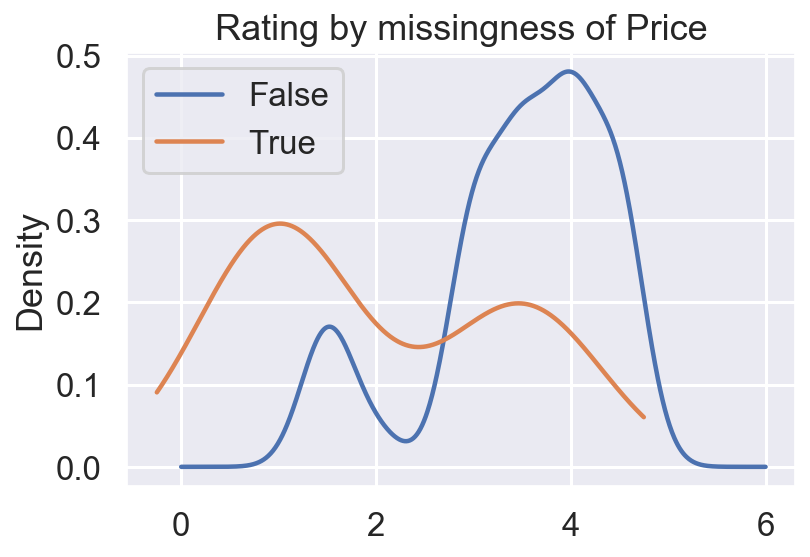

In [150]:
# Distribution of ratings when price is null/not null 

(
    df
    .assign(is_null=df.price.isnull())
    .groupby('is_null')
    .rating
    .plot(kind='kde', legend=True, title='Rating by missingness of Price')
);

- As we can see, these two distributions are drastically different.
- We are more convinced that price data is missing at random dependent on the values of rating data.
- Now, we need to conduct a permutation test to convince ourselves.

In [134]:
# permutation test body
# null hypothesis: two distributions are from the same distribution. (Price data is missing completely at random: MCAR)
# alternative hypothesis: two distributions are different. (Price data is MAR dependent on rating)
n_repetitions = 500

means = []
for _ in range(n_repetitions):
    
    # shuffle the rating column
    shuffled_col = (
        df['rating']
        .sample(replace=False, frac=1)
        .reset_index(drop=True)
    )
    
    # put them in a table
    shuffled = (
        df
        .assign(**{
            'col': shuffled_col,
            'is_null': df['price'].isnull()
        })
    )
    
    # compute the differences in means
    mean = shuffled.groupby('is_null')['col'].mean().diff().abs().iloc[-1]
    
    means.append(mean)

In [135]:
# observed statistic
obs = df.assign(is_null=df['price'].isnull()).groupby('is_null')['rating'].mean().diff().abs().iloc[-1]

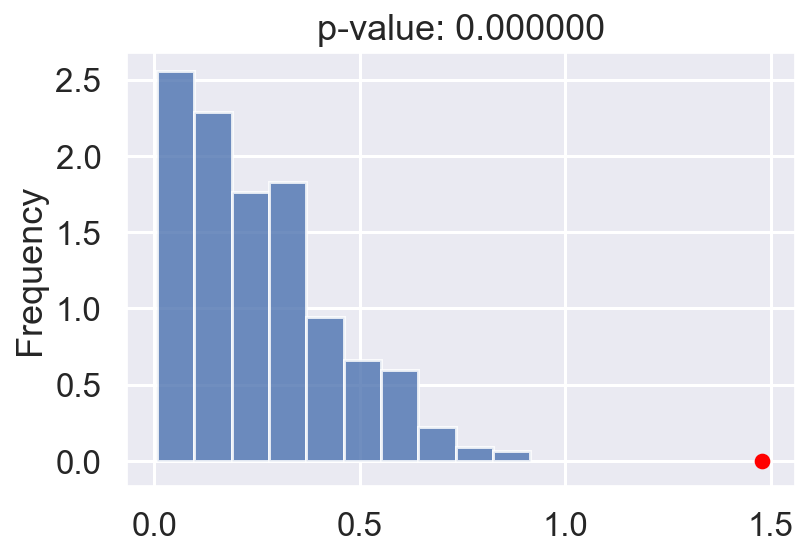

In [151]:
pval = np.mean(means > obs)
pd.Series(means).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)
plt.scatter(obs, 0, color='red', s=40);

- Conclusion, these two distributions are completely differet, because the p-value is almost zero.
- This is useful as we need to impute price data for further prediction.

#### Relationiship between ratings and inspection scores
- According to the hypothesis, there is a relationship between ratings and inspection scores.
- Understanding the relationship, whether or not it's linear, is cruical for my analysis as it provides the basis for the further prediction.

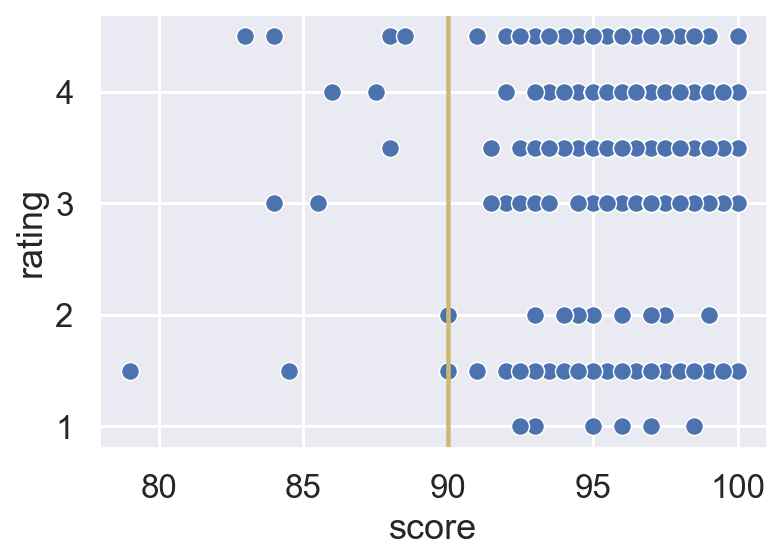

In [159]:
# scatter plot of score vs. rating
sns.scatterplot(x='score', y='rating', data=df);
cutoff = 90 # cutoff for the linear relationship
plt.axvline(x=cutoff, color='y');

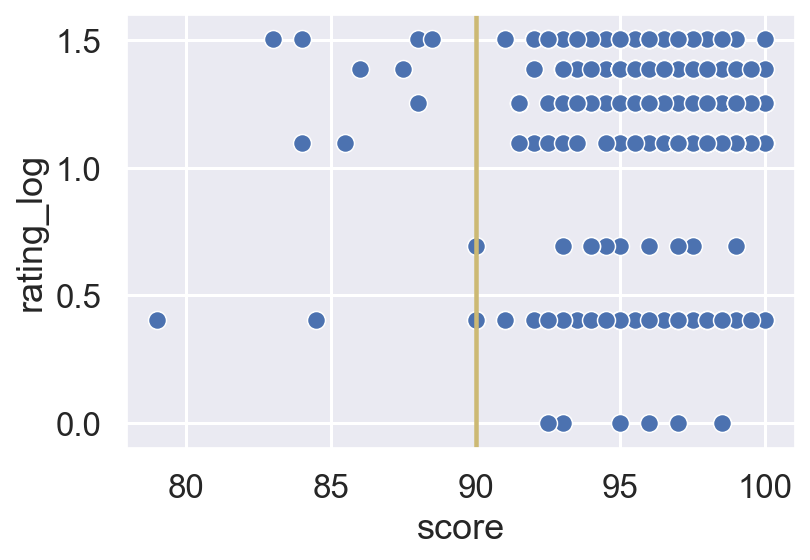

In [160]:
# scatterplot of score vs. log of rating values
sns.scatterplot(x='score', y='rating_log', data=df.assign(rating_log=df.rating.apply(np.log)));
cutoff = 90 # cutoff for the linear relationship
plt.axvline(x=cutoff, color='y');

- From the two plots above, we can tell there is a possible linear relationship when the score is less than 90. In other words, the health condition will dominant cutomers preference as they go the restaurants with inspection scores under 90.
- For restaurants with inspection scores greater than 90, cutomers' personal preferences will take the dominance as they rate the restaurants. 
- Therefore, it is important to include the "food" data in yelp dataframe in order to predict the ratings more accurately.

In [295]:
# from the conclusion above, we are modifying dataset for our prediction model;
# copy the index of combined yelp and inspections
idx = df.index
# food columns from yelp dataframe
cols = yelp.columns[11:]
# convert food dataframe from yelp dataframe to dtype=int
foods = yelp[cols].astype(int)
# assign food dataframe to df, name it pred_df
pred_df = df[['rating', 'review_count', 'price', 'score']].assign(**foods.loc[idx].to_dict(orient='list'))
pred_df.head()

,rating,review_count,price,score,hotdogs,sandwiches,pizza,tradamerican,burgers,mexican,...,italian,newamerican,chicken_wings,delis,bars,salad,seafood,bbq,bakeries,sushi
0,3.5,11,2.0,100.0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,3.5,11,2.0,99.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.5,11,2.0,96.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3.5,11,2.0,100.0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,3.5,11,2.0,96.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Baseline Model
- categorical columns: 
    - foods are already converted to one-hot ordinal data, we are just using pca to add weights to them. 
- numerical columns:
    - impute with zeros and pass through
- prediction model: LinearRegression

In [186]:
# We are using data in X to predict y
X = pred_df.drop('rating', axis=1)
y = pred_df.rating

In [189]:
# specify categorical and numerical columns for further use
catecols = cols
numcols = ['review_count', 'price', 'score']

In [227]:
# baseline model
cates = Pipeline([
    ('pca', PCA(svd_solver='full', n_components=0.99)),
])

nums = SimpleImputer(strategy='constant', fill_value=0)
# use a ColumnTransformer to put together transformer for categorical columns and numerical columns
ct = ColumnTransformer([
    ('cate', cates, catecols),
    ('num', nums, numcols)
])

pl = Pipeline([('feats', ct), ('reg', LinearRegression())])

In [228]:
# split using the default param test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [229]:
# fit the model
pl.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('feats',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cate',
                                                  Pipeline(memory=None,
                                                           steps=[('pca',
                                                                   PCA(copy=True,
                                                                       iterated_power='auto',
                                                                       n_components=0.99,
                                                                       random_state=None,
                                                                       svd_solver='full',
                                                                       tol=0.0,
                                      

In [230]:
# R^2 score for the baseline model
pl.score(X_test, y_test)

0.21626543229545825

- The R^2 score for our baseline model is below 0.3 suggesting that our model is a bit better than random guessing.
- I will improve the model as more features will be added.
    - Feature 1: Standardize `review_count` based on price levels. We can learn from the analysis above that difference review_count and price levels can lead to different ratings.
    - Feature 2: Use PCA to add weights to `review_counts` and `price` as we revealed the relationship between them in the analysis above.
    - Feature 3: Change LinearRegressor to RandomForestRegressor.
    - Feature 4: Use GridSearchCV to optimize the combination of parameters in RandomForestRegressor constructor. (Only results are shown in the constructor since the function GridSearchCV.fit is extremely time-consuming)

In [333]:
# For the convenience of stanardizing columns, I will implement a transformer called StdScalerByGroup as below
from sklearn.base import BaseEstimator, TransformerMixin


class StdScalerByGroup(BaseEstimator, TransformerMixin):

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """
        :Example:
        >>> cols = {'g': ['A', 'A', 'B', 'B'], 'c1': [1, 2, 2, 2], 'c2': [3, 1, 2, 0]}
        >>> X = pd.DataFrame(cols)
        >>> std = StdScalerByGroup().fit(X)
        >>> std.grps_ is not None
        True
        """
        # X may not be a pandas dataframe (e.g. a np.array)
        df = pd.DataFrame(X)
        group = df.columns[0]
        mean_dict = df.groupby(group).agg(np.mean).to_dict('index')
        std_dict = df.groupby(group).agg(np.std).to_dict('index')

        # A dictionary of means/standard-deviations for each column, for each group.
        self.grps_ = {'mean':mean_dict, 'std':std_dict}

        return self

    def transform(self, X, y=None):
        """
        :Example:
        >>> cols = {'g': ['A', 'A', 'B', 'B'], 'c1': [1, 2, 3, 4], 'c2': [1, 2, 3, 4]}
        >>> X = pd.DataFrame(cols)
        >>> std = StdScalerByGroup().fit(X)
        >>> out = std.transform(X)
        >>> out.shape == (4, 2)
        True
        >>> np.isclose(out.abs(), 0.707107, atol=0.001).all().all()
        True
        """

        try:
            getattr(self, "grps_")
        except AttributeError:
            raise RuntimeError("You must fit the transformer before tranforming the data!")

        # X may not be a dataframe (e.g. np.array)
        df = pd.DataFrame(X)
        out = pd.DataFrame()
        idx = df.columns[1:]
        group = df.columns[0]
        mean_dict = self.grps_['mean']
        std_dict = self.grps_['std']
        for i in idx:
            out[i] = df.apply(lambda x:(x[i] - mean_dict[x[group]][i])/std_dict[x[group]][i], axis=1)

        return out

In [342]:
# Model Optimization
pred_df['price'] = pred_df.price.fillna(0)

cates = Pipeline([
    ('pca', PCA(svd_solver='full', n_components=0.99)),
])

nums = SimpleImputer(strategy='constant', fill_value=0)
t = Pipeline([
    ('z_score', StdScalerByGroup()), 
    ('impute', SimpleImputer(strategy='mean'))
])
# use a ColumnTransformer to put together transformer for categorical columns and numerical columns
ct = ColumnTransformer([
    ('cate', cates, catecols),
    ('num', nums, numcols),
    ('pca', cates, ['price', 'review_count']),
    ('t1', t, ['price', 'review_count'])
    
])

final_pl = Pipeline([('feats', ct), ('reg', RandomForestRegressor(max_depth=5, min_sample_split=2, min_samples_leaf=2, n_estimators=100))])

In [344]:
# We are using data in X to predict y
X = pred_df.drop('rating', axis=1)
y = pred_df.rating

In [355]:
# split using the default param test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [356]:
final_pl.fit(X_train, y_train)

/Users/haibo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


Pipeline(memory=None,
         steps=[('feats',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cate',
                                                  Pipeline(memory=None,
                                                           steps=[('pca',
                                                                   PCA(copy=True,
                                                                       iterated_power='auto',
                                                                       n_components=0.99,
                                                                       random_state=None,
                                                                       svd_solver='full',
                                                                       tol=0.0,
                                      

In [357]:
final_pl.score(X_test, y_test)

/Users/haibo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


0.9110479987962683

- The R^2 is now around 0.85~0.95, which is much greater than what we had before which was about 0.3.

/Users/haibo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: RuntimeWarning: invalid value encountered in double_scalars


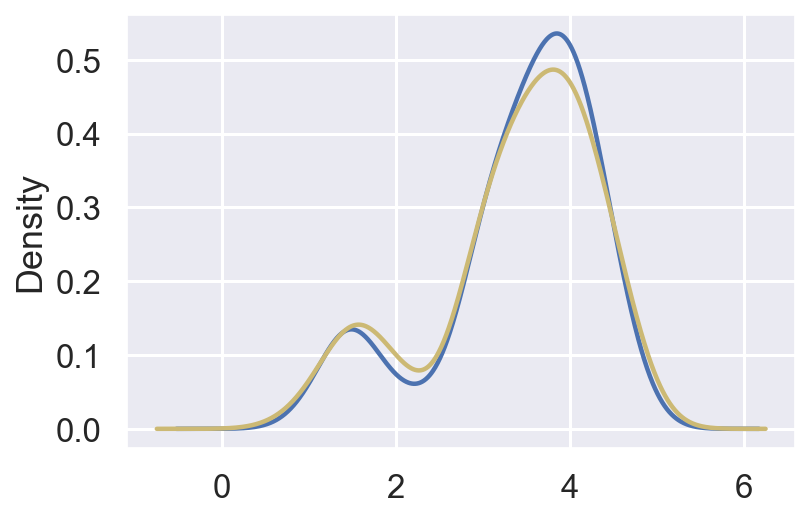

In [368]:
predicted = final_pl.predict(X_test)
actual = y_test
pd.Series(predicted).plot(kind='kde');
y_test.plot(kind='kde', color='y');

- The final model has been improved drastically after more features are added.
- As we can see the predicted ratings and actual ratings look very similar now.
- If there is time for further analysis, I will also check if there is a over-fitting problem since these two distributions look a little "too" similar.

# Ethics & Privacy

- When we use yelp data and analysis the ratings of each customer on restaurants, it is important for us to concern the consent issues. We need to reach out to the users on yelp wesite or yelp app to let them fill out the consent form in order to allow us to further analyze their data. Otherwise, the project should not be going any further.
- When we use the inspections data, we need to realize that the information in the inspections.csv contains the specified terms and scores of every restaurant. It is our responsibility to reach our to local restaurants and local government to request the permission to continue our project. If they are fine with the project, it is also our responsibility to inform them any impact this project may bring to them. For example, if some customer reads the project and realize that the restaurant he/she/they usually goes to actually has health inspection issues and the customer decides not to go there anymore. This economic impact is one of the impacts they we must inform the restaurant owners.
- The data on restaurants' inspection scores is available on local government websites because the inspection grade is made availale for everyone on purpose. There is no obvious privacy issue on this part of the dataset. However, we have to consider ethics and privacy when we use Yelp API and work on the customers data. We should not leak customers information including names, age, gener, phone numbers, address, etc. These should be restricted to only the purpose of this project.

# Conclusion & Discussion

- The datasets used: The combination of inspections.csv and yelp.csv by the location of a restaurant.
    - Discussion: The most of the data is clean and it is easy and convenient to use. However, the useful dataset only has 425 observations for me to explore. This is a disadvantage because data might be biased as the combining process lost most of the data included in the inspection dataframe. This is one of the reasons that might make the prediction model to be over-fitting.
- EDA before building the prediction model:
    - `Critical vs. Non Critical`: What I am most interested in is whether or not there is a relationship bewteen the inspection scores and restsaurants rating. `Findings`: The restaurants that does not have critical inspection issues tend to have higher mean score than those who have. In addition, non_critical restaurants tend to be more symmetric and "critical" restaurants are more skewed to the left.
    - `Review Counts vs. Ratings`: Generally, people tend to rate restaurants which they love the most or hate the most. `Findings`: The result shows that the restaurants with the number of review greater than the average has mean rating of 3.686047 and those below average has 3.27 rating on average.
    - `Null values in price column`: Guess: Price data is Missing at Random. (MAR) The missingess of price data probably depends on the value of rating but we cannot say some values of rating must lead to the missingess of the price data. `Findings`: The missingness of data in price column is missing at random dependent on ratings.
    - `Relationship between inspection score and rating`: We can tell there is a possible linear relationship when the score is less than 90. In other words, the health condition will dominant cutomers preference as they go the restaurants with inspection scores under 90. For restaurants with inspection scores greater than 90, cutomers' personal preferences will take the dominance as they rate the restaurants. This is different from what I expected before, since I thought there is a good chance that people will rate restaurants with low inspection score pretty low. However, I now realized that the actual relationship makes much more sense.
- prediction model:
    - Baseline model: 
        - categorical columns: 
            - foods are already converted to one-hot ordinal data, we are just using pca to add weights to them. 
        - numerical columns:
            - impute with zeros and pass through
        - prediction model: LinearRegression
        - The baseline model is designed for the purpose of simplicity, not accuracy. That is why more dedicated features are added later. However, I have never met the situation of such a low R^2 score before. This is probably because there is a weak relationship so that LinearRegression works not as good as TreeRegressors, such as DecisionTreeRegressor and RandomForestRegressor.
    - Final model:
        - Feature 1: Standardize `review_count` based on price levels. We can learn from the analysis above that difference review_count and price levels can lead to different ratings.
        - Feature 2: Use PCA to add weights to `review_counts` and `price` as we revealed the relationship between them in the analysis above.
        - Feature 3: Change LinearRegressor to RandomForestRegressor.
        - Feature 4: Use GridSearchCV to optimize the combination of parameters in RandomForestRegressor constructor. (Only results are shown in the constructor since the function GridSearchCV.fit is extremely time-consuming)
    - The Baseline model has R^2 score of only about 0.3, which suggests a weak prediction. After the features are added, the final model has R^2 score of above 0.9, which is robust based on this dataset. As we can see the predicted ratings and actual ratings look very similar now. If there is time for further analysis, I will also check if there is a over-fitting problem since these two distributions look a little "too" similar. The R^2 score might be too high suggesting that there is probably a over-fitting issue. This is reasonable since I choose RandomForestRegressor as the base machine learning algorithm. Tree Regressor might cause more overfitting issues than linear regressors.
    
- Impact of my study:
    - The machine learning model I built is  useful in terms of predict restaurants ratings. This is especially useful to algorithms that recommand restaurants customers according to their tastes or algorithms that rate restaurants that do not have much information and previous ratings. I will definitely work on this project this summer to address the over-fitting issue and implement it into a more completed recommanding algorithm.
